# Visualizing COVID-19 Hospital Dataset with Seaborn

**Pre-Work:**
1. Ensure that Jupyter Notebook, Python 3, and seaborn (which will also install dependency libraries if not already installed) are installed. (See resources below for installation instructions.)

### **Instructions:**
1. Using Python, import main visualization library, `seaborn`, and its dependencies: `pandas`, `numpy`, and `matplotlib`.
2. Define dataset and read in data using pandas function, `read_json()`. [Notes: a) we're reading in data as an API endpoint; for more about this, see associated workshop slides or resources at bottom of notebook. b) If, instead, you prefer to use your own data, see comment with alternative for `read_csv()`.]
3. Check data has been read is as expected using `head()` function.
4. Graph two variables with `seaborn`as a lineplot using the `lineplot()` function.
5. Graph these same variables, plus a third, from the source dataset with `seaborn` as a scatterplot using the `relplot()` function.
6. See additional methods, using filtered data and other graphs. Feel free to open a new notebook, and try out your own ideas, using different variables or charts. (Or try out your own data!)
7. When ready, save figure using `matplotlib`'s `savefig`.

**Note:**
*If you're new to Jupyter Notebook, see resources below.*

### **Data source:**

[COVID-19 Reported Patient Impact and Hospital Capacity by State Timeseries](https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh)," created by the U.S. Department of Health & Human Services, on [HealthData.gov](https://healthdata.gov/).

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# read JSON data in via healthdata.gov's API endpoint - https://healthdata.gov/resource/g62h-syeh.json?$limit=50000
# because the SODA API defaults to 1,000 rows, we're going to change that with the $limit parameter
# define data as 'covid' and set equal to read function
# if we want filtered data to compare to, define more datasets

covid = pd.read_json("https://healthdata.gov/resource/g62h-syeh.json?$limit=50000")

covid_ct = pd.read_json("https://healthdata.gov/resource/g62h-syeh.json?state=CT")

covid_maytopresent = pd.read_json("https://healthdata.gov/resource/g62h-syeh.json?$limit=50000&$where=date%20between%20%272021-05-01T12:00:00%27%20and%20%272021-08-01T12:00:00%27")

# if you want to read in your own data, see resources below, or if you have a CSV, try: mydata = pd.read_csv('')
# and add data filepath inside ''
# be sure to change covid to mydata in code below

In [4]:
# use head function and call our dataset (covid) to see the first few rows 
# the default argument for this function is 5 rows, but you can set this to anything, e.g. covid.head(20)
covid.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_adult_covid_suspected_18_19,previous_day_admission_adult_covid_suspected_20_29,previous_day_admission_adult_covid_suspected_30_39,previous_day_admission_adult_covid_suspected_40_49,previous_day_admission_adult_covid_suspected_50_59,previous_day_admission_adult_covid_suspected_60_69,previous_day_admission_adult_covid_suspected_70_79,previous_day_admission_adult_covid_suspected_80_,adult_icu_bed_covid_utilization,adult_icu_bed_utilization
0,PR,2020-07-27,1,1,55,1,1,55,0.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PR,2020-07-24,1,0,56,1,0,56,0.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PR,2020-07-23,1,1,55,1,1,55,0.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IA,2020-07-22,0,2,120,0,2,120,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,PR,2020-07-22,1,1,55,1,1,55,0.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# example of head with more rows
covid_ct.head(20)

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_adult_covid_confirmed_unknown,previous_day_admission_adult_covid_suspected_18_19,previous_day_admission_adult_covid_suspected_20_29,previous_day_admission_adult_covid_suspected_30_39,previous_day_admission_adult_covid_suspected_40_49,previous_day_admission_adult_covid_suspected_50_59,previous_day_admission_adult_covid_suspected_60_69,previous_day_admission_adult_covid_suspected_70_79,previous_day_admission_adult_covid_suspected_80_,previous_day_admission_adult_covid_suspected_unknown
0,CT,2020-07-16,1,4,26,1,4,26,0.0,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CT,2020-10-21,7,24,1,7,24,1,9.0,30,...,1.0,0.0,3.0,4.0,6.0,15.0,13.0,16.0,17.0,3.0
2,CT,2020-09-06,0,7,25,0,7,25,5.0,30,...,4.0,0.0,2.0,2.0,0.0,10.0,6.0,7.0,12.0,9.0
3,CT,2020-06-29,0,0,32,0,0,32,4.0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CT,2020-07-02,0,0,35,0,0,35,4.0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CT,2020-06-30,0,0,32,0,0,32,4.0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CT,2020-10-12,6,25,1,5,26,1,4.0,30,...,0.0,0.0,5.0,6.0,7.0,10.0,11.0,14.0,14.0,1.0
7,CT,2020-12-17,2,37,1,3,36,1,43.0,39,...,8.0,1.0,1.0,5.0,4.0,12.0,17.0,10.0,26.0,0.0
8,CT,2020-05-12,0,0,36,0,0,36,40.0,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CT,2020-03-25,0,0,2,0,0,2,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


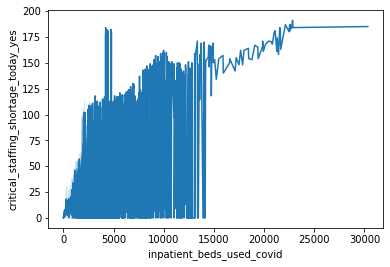

In [9]:
# use seaborn to plot inpatient beds used versus whether a critical staffing shortage is occuring
# we also need to tell seaborn what dataset to use; in this case it's 'covid' as defined above
# variables: inpatient_beds_used_covid; critical_staffing_shortage_today_yes

sns.lineplot(x='inpatient_beds_used_covid', y="critical_staffing_shortage_today_yes", data=covid)

# save and name fig; uncomment below to run
# plt.savefig('covid_lineplot.png')

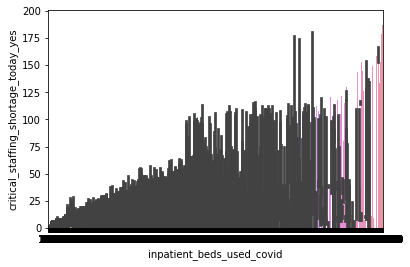

In [12]:
# use seaborn to plot inpatient beds used versus whether a critical staffing shortage is occuring
# this time, with a bar plot
# variables: inpatient_beds_used_covid; critical_staffing_shortage_today_yes

sns.barplot(x='inpatient_beds_used_covid', y="critical_staffing_shortage_today_yes", data=covid)

# save and name fig; uncomment below to run
# plt.savefig('covid_barplot.png')

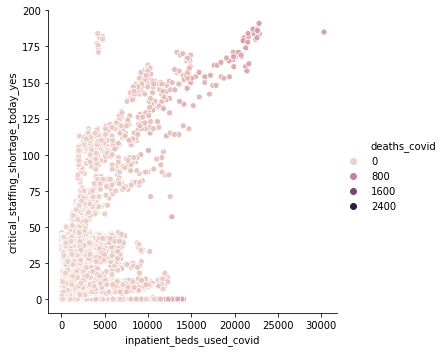

In [8]:
# now we're going to try another graph type, a relational graph that will be scatterplot, with the same variables
# and add one more variable, deaths_covid, to color dots based on prevalance of COVID-19 deaths by setting hue
# though feel free to try new variables by browsing them here (scroll down to Columns in this Dataset): https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh
# variables: inpatient_beds_used_covid; critical_staffing_shortage_today_yes; deaths_covid

sns.relplot(x='inpatient_beds_used_covid', y="critical_staffing_shortage_today_yes", hue="deaths_covid", data=covid)

# save and name fig; uncomment below to run
# plt.savefig('covid_scatterplot.png')

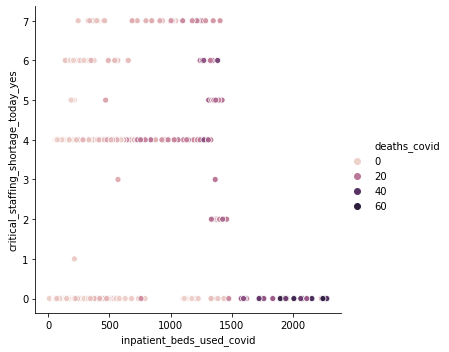

In [8]:
# now let's try some graphs with the more limited datasets above, for instance, just the CT data

sns.relplot(x='inpatient_beds_used_covid', y="critical_staffing_shortage_today_yes", hue="deaths_covid", data=covid_ct)


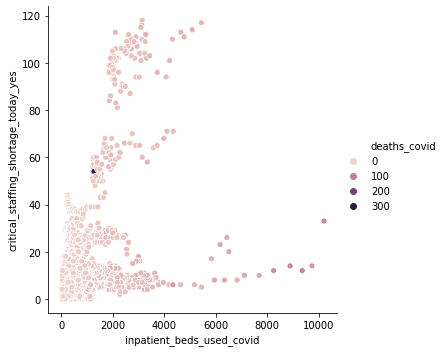

In [9]:
# or just the May - August (present) 2021 date range

sns.relplot(x='inpatient_beds_used_covid', y="critical_staffing_shortage_today_yes", hue="deaths_covid", data=covid_maytopresent)


### Final Note:
It's important to remember that we can't necessarily infer any causation or directionality from these charts, but they can be a good place to start for further analysis and exploration, and can point us in the right direction of where to apply more advanced statistical methods, such as linear regression. Even with more advanced methods, though, we still want to stick the principles we're using here: keep charts as simple as possible, using only a few variables, and adding color only where needed. We want our charts to be readable and understandable -- see resources below for more advice and guidance on this. 

Ultimately, these quick-start methods are helpful for idea generation and early investigation, and can get that process up and running quickly.

#### Code/Tools Resources:
- Jupyter notebook - about: https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#introduction
- Jupyter notebook - how to use this tool: https://jupyter-notebook.readthedocs.io/en/stable/notebook.html
- Python: https://www.python.org/
- Seaborn: https://seaborn.pydata.org/index.html
- Seaborn tutorial: https://seaborn.pydata.org/tutorial.html
- Seaborn gallery: https://seaborn.pydata.org/examples/index.html
- Seaborn `lineplot()` function: https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot + https://seaborn.pydata.org/examples/errorband_lineplots.html
- Seaborn `relplot()` function: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot + https://seaborn.pydata.org/examples/faceted_lineplot.html
- Pandas: https://pandas.pydata.org/
- Pandas - how to read / write tabular data: https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html
- Pandas `read.json()` function: https://pandas.pydata.org/docs/reference/api/pandas.io.json.read_json.html?highlight=read_json#pandas.io.json.read_json
- Pandas `head()` function: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head
- Matplotlib: https://matplotlib.org/
- Matplotlib `savefig` function: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
- Socrata Open Data API (SODA) Docs: https://dev.socrata.com/
- SODA Docs for [Dataset](https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh): https://dev.socrata.com/foundry/healthdata.gov/g62h-syeh
- SODA Docs - what is an endpoint: https://dev.socrata.com/docs/endpoints.html

#### Visualization Resources:
- 10 Simple Rules for Better Figures | *PLOS Comp Bio*: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833

- How to Choose the Right Data Visualization | *Chartio*: https://chartio.com/learn/charts/how-to-choose-data-visualization/

#### Additional Note:
This notebook was created by Kaitlin Throgmorton for a data analysis workshop, as part of an interview for Yale University.